# <center>Nursery Data Analysis</center>

### Modules

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Initializing the dataframe

In [24]:
df = pd.read_csv("admission_student.csv", header=None) # got no headers initially
cols = ['parents', 'has_nursery', 'form', 'children', 'housing', 'finance', 'social', 'health', 'NURSERY']
df.columns = cols
df.head()

,parents,has_nursery,form,children,housing,finance,social,health,NURSERY
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   parents      12960 non-null  object
 1   has_nursery  12960 non-null  object
 2   form         12960 non-null  object
 3   children     12960 non-null  object
 4   housing      12960 non-null  object
 5   finance      12960 non-null  object
 6   social       12960 non-null  object
 7   health       12960 non-null  object
 8   NURSERY      12960 non-null  object
dtypes: object(9)
memory usage: 911.4+ KB


In [26]:
df.describe(include='O')

,parents,has_nursery,form,children,housing,finance,social,health,NURSERY
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,usual,proper,complete,1,convenient,convenient,nonprob,recommended,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


In [27]:
df.shape

(12960, 9)

### Data Wrangling

In [28]:
df.isnull().sum()

parents        0
has_nursery    0
form           0
children       0
housing        0
finance        0
social         0
health         0
NURSERY        0
dtype: int64

### Data Visualization

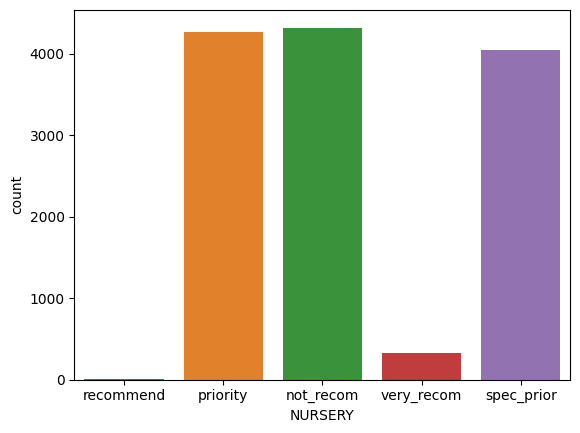

In [29]:
sns.countplot(x=df['NURSERY'])
plt.show()

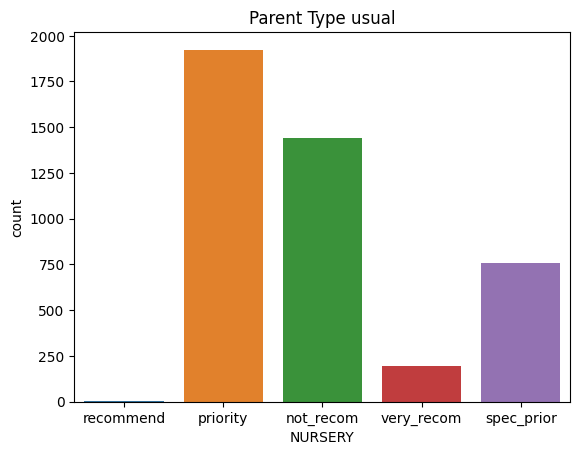

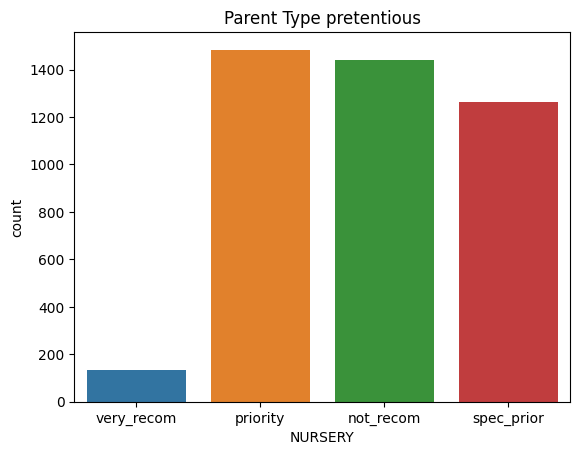

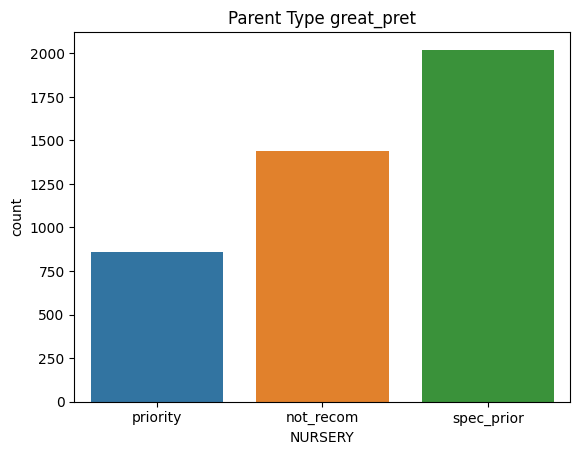

In [30]:
for i in df.parents.unique():
    temp = df[df.parents == i]
    sns.countplot(x=temp['NURSERY'])
    plt.title(f"Parent Type {i}")
    plt.show()

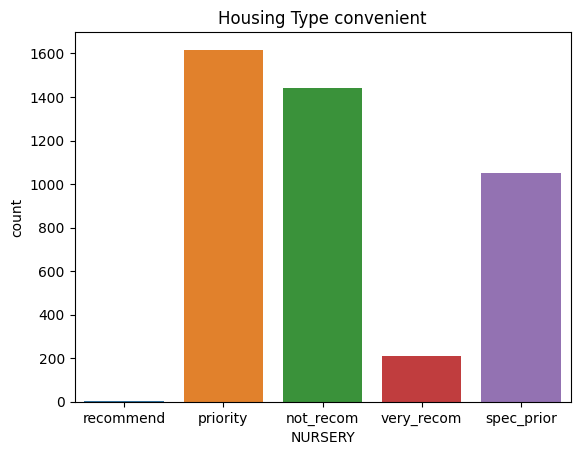

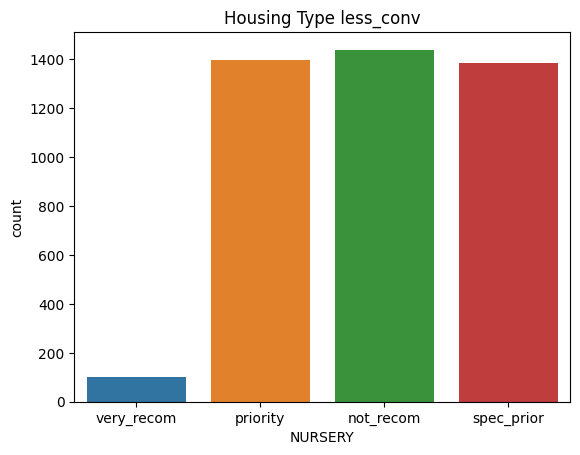

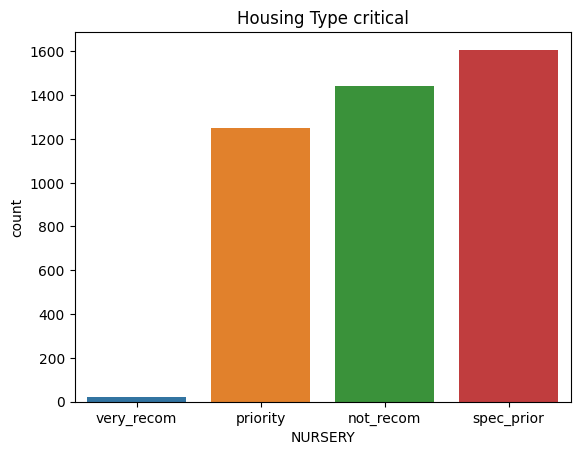

In [31]:
for i in df.housing.unique():
    temp = df[df.housing == i]
    sns.countplot(x=temp['NURSERY'])
    plt.title(f"Housing Type {i}")
    plt.show()

### Model Training

In [46]:
X = df.drop(columns=['NURSERY'])
y = df['NURSERY']

##### Converting object type to numeric type

In [55]:
ohe = OneHotEncoder()

encoded_labels = ohe.fit_transform(X).toarray()
X = encoded_labels

In [56]:
le = LabelEncoder()
y = le.fit_transform(y)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression()

In [60]:
y_pred = regressor.predict(X_test)

In [61]:
accuracy_score(y_test, y_pred)

0.9266975308641975

The model is 92.66% accurate.